In [1]:
from pirate_strategies import RationalPirate, GreedyPirate, EgalitarianPirate, RandomPirate, VengefulPirate
from pirate_game import *
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import time
from collections import defaultdict


## Run Game

In [2]:
# Define the pirate classes\n",
pirate_classes = [RationalPirate, GreedyPirate, EgalitarianPirate, RandomPirate, VengefulPirate]
# Run the games and get the results\n
final_results = run_multiple_games(pirate_classes, 100)




######################################################################
--- GAME 1 ---
Rank:
   1: RationalPirate (Captain)
   2: GreedyPirate
   3: EgalitarianPirate
   4: RandomPirate
   5: VengefulPirate

Voting: 
RationalPirate proposes: [99, 1, 0, 0, 0]
Votes: [True, True, False, True, False]
Accept: 60%
Reject: 40%

✅ Distribution accepted! 

Final distribution for this game:
   1: RationalPirate - 99
   2: GreedyPirate - 1
   3: EgalitarianPirate - 0
   4: RandomPirate - 0
   5: VengefulPirate - 0

######################################################################
--- GAME 2 ---
Rank:
   1: GreedyPirate (Captain)
   2: EgalitarianPirate
   3: RandomPirate
   4: VengefulPirate
   5: RationalPirate

Voting: 
GreedyPirate proposes: [96, 1, 1, 1, 1]
Votes: [True, False, False, False, True]
Accept: 40%
Reject: 60%

❌ GreedyPirate walks the plank! 💀

Voting: 
EgalitarianPirate proposes: [25, 25, 25, 25]
Votes: [True, True, False, True]
Accept: 75%
Reject: 25%

✅ Distribution accep

## Final Tally

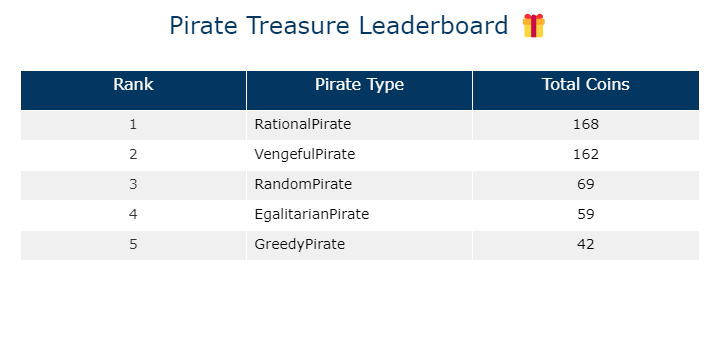

In [7]:
# Create a pandas DataFrame from the results
df_results = pd.DataFrame(list(final_results.items()), columns=['Pirate Type', 'Total Coins'])

# Sort the DataFrame by Total Coins in descending order
df_results_sorted = df_results.sort_values('Total Coins', ascending=False).reset_index(drop=True)

# Create color scale
colors = ['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD', '#F0E68C']

# Create the figure
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Rank', 'Pirate Type', 'Total Coins'],
        fill_color='#033660',
        align='center',
        font=dict(color='white', size=16),
        height=40
    ),
    cells=dict(
        values=[
            df_results_sorted.index + 1,  # Rank
            df_results_sorted['Pirate Type'],
            df_results_sorted['Total Coins']
        ],
        fill_color=[['#f0f0f0', 'white'] * len(df_results_sorted)],  # alternating row colors
        align=['center', 'left', 'center'],
        font=dict(color=['#333', '#000', '#000'], size=14),
        height=30
    ))
])

# Update layout
fig.update_layout(
    title={
        'text': "Pirate Treasure Leaderboard 🎁",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='#033660')
    },
    margin=dict(l=20, r=20, t=70, b=20),
    height=350,
    width=700,
)

# Show the table
fig.show()

# If you want to save the table as an HTML file (interactive)
#pio.write_html(fig, file='pirate_leaderboard_table.html', auto_open=True)

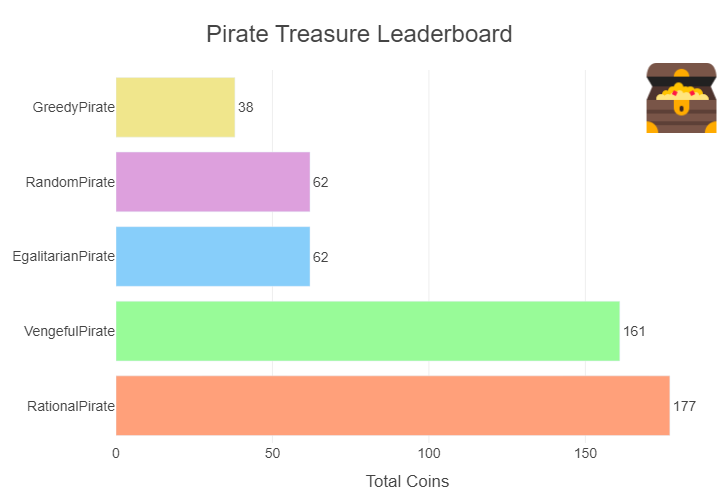

In [15]:

# Create color scale
colors = ['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD', '#F0E68C']

# Create the figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add bars
fig.add_trace(go.Bar(
    y=df_results_sorted['Pirate Type'],
    x=df_results_sorted['Total Coins'],
    orientation='h',
    marker=dict(color=colors[:len(df_results_sorted)]),
    text=df_results_sorted['Total Coins'],
    textposition='outside',
    insidetextanchor='middle',
    textfont=dict(size=14),
    hoverinfo='text',
    hovertext=[f"{pirate}: {coins} coins" for pirate, coins in zip(df_results_sorted['Pirate Type'], df_results_sorted['Total Coins'])],
))

# Update layout
fig.update_layout(
    title={
        'text': "Pirate Treasure Leaderboard",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='#444444')
    },
    xaxis_title="Total Coins",
    font=dict(family="Arial", size=14, color="#444444"),
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='#DDDDDD', gridwidth=0.5),
    yaxis=dict(showgrid=False),
    margin=dict(l=100, r=20, t=70, b=50),
    height=500,
    width=800,
)

# Add a treasure chest icon
fig.add_layout_image(
    dict(
        source="https://img.icons8.com/color/96/000000/treasure-chest.png",
        xref="paper", yref="paper",
        x=1.05, y=1.05,
        sizex=0.25, sizey=0.25,
        xanchor="right", yanchor="top"
    )
)

# Show the plot
fig.show()

# If you want to save the plot as an HTML file (interactive)
#pio.write_html(fig, file='pirate_leaderboard.html', auto_open=True)